# Data comparison

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
loc_data = pd.read_csv("danrer11_guide_results.txt", sep="\t",usecols=["GUIDE","qPCR"])

D:\download\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Distribution of qPCR')

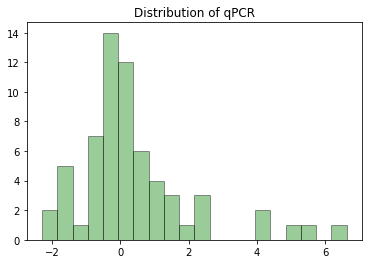

In [3]:
plt.hist(loc_data['qPCR'], bins=20, normed=0, facecolor="green", edgecolor="black", alpha=0.4)
plt.title('Distribution of qPCR')

In [3]:
data_train = pd.read_csv('data/danrer11_chopchop_train.csv',index_col=0)
data_test = pd.read_csv('data/danrer11_chopchop_test.csv',index_col=0)
frames = [data_train,data_test]
result = pd.concat(frames)

D:\download\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Distribution of EFFICIENCY')

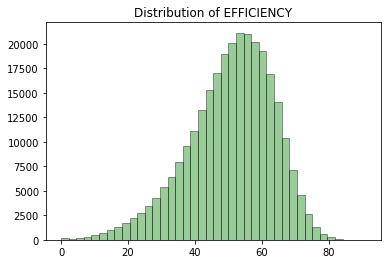

In [118]:
plt.hist(result['EFFICIENCY'], bins=40, normed=0, facecolor="green", edgecolor="black", alpha=0.4)
plt.title('Distribution of EFFICIENCY')

In [104]:
loc_data.describe()

,qPCR
count,63.000000
mean,0.411760
std,1.761681
min,-2.290000
25%,-0.476091
50%,0.090000
75%,0.872331
max,6.627324


In [74]:
right = result[['GUIDE','EFFICIENCY']]
compare = pd.merge(loc_data, right, on='GUIDE')
compare['EFFICIENCY'] = compare['EFFICIENCY']/100
compare['diff'] = compare['qPCR']-compare['EFFICIENCY']

5.618770697902599

scale the qPCR data using max-min

In [81]:
q_max = max(compare['qPCR'])
q_min = min(compare['qPCR'])
compare['scale_qPCR'] = (compare['qPCR']- q_min) / (q_max-q_min)

In [82]:
compare['scale_diff'] = compare['scale_qPCR']-compare['EFFICIENCY']

D:\download\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'differences between scaled qPCR and EFFICIENCY')

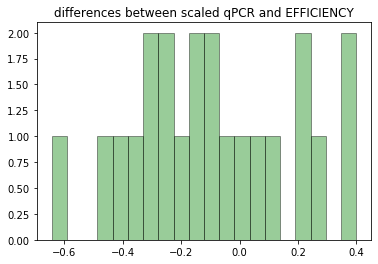

In [117]:
plt.hist(compare['scale_diff'], bins=20, normed=0, facecolor="green", edgecolor="black", alpha=0.4)
plt.title('differences between scaled qPCR and EFFICIENCY')

In [84]:
compare['scale_qPCR']

0     0.584958
1     0.908802
2     0.597170
3     0.264264
4     0.322250
5     0.391257
6     0.282844
7     0.823137
8     0.424845
9     0.597333
10    0.490724
11    0.453446
12    0.182076
13    0.000000
14    0.289405
15    0.495532
16    0.408445
17    0.203614
18    0.121384
19    1.000000
20    0.836367
21    0.341621
Name: scale_qPCR, dtype: float64

In [92]:
compare

,GUIDE,qPCR,EFFICIENCY,diff,scale_qPCR,scale_diff
0,GTGCCAAGTATAATGAGGAATGG,2.336301,0.4863,1.850001,0.584958,0.098658
1,TGTAGCATAGTCGTGTTTGGAGG,4.897509,0.5353,4.362209,0.908802,0.373502
2,CCAAGTGAGACTTCGGAAAAAGG,2.432883,0.3937,2.039183,0.597170,0.203470
3,AACAGAACTAATGCATTACGAGG,-0.200000,0.6904,-0.890400,0.264264,-0.426136
4,ACGGACAACTTTATTCACTCGGG,0.258600,0.5693,-0.310700,0.322250,-0.247050
5,TCGGATTTTAGGAGTGATTATGG,0.804362,0.3819,0.422462,0.391257,0.009357
6,CATTGGGTCTCGAGTCCCGGAGG,-0.053051,0.6600,-0.713051,0.282844,-0.377156
7,TGCGCGTGGGGAAGAAGCAGAGG,4.220000,0.6162,3.603800,0.823137,0.206937
8,CGCACTTTCGCCGTCTACTACGG,1.070000,0.3877,0.682300,0.424845,0.037145
9,CCTCCAGTCTGGAAACAACTGGG,2.434167,0.6234,1.810767,0.597333,-0.026067


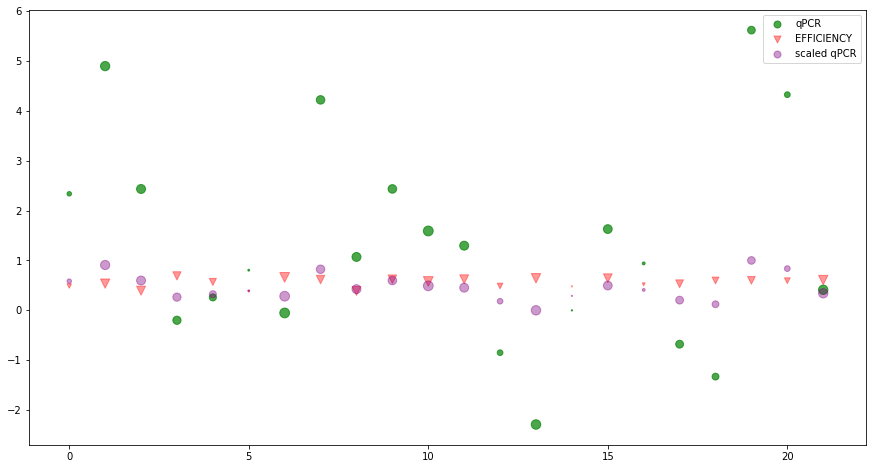

In [109]:

N = len(compare)
x = np.arange(0,N)
y1 = compare['scale_qPCR']
y2 =  compare['EFFICIENCY']
y3 =  compare['qPCR']

area = np.random.rand(N) * 100
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
p3 = ax.scatter(x, y3, s=area, c='green', alpha=0.7)
#c=area, cmap='Reds',
p2 = ax.scatter(x, y2, s=area, c='red', marker='v', alpha=0.4)  # 更换标记样式，另一种颜色的样式
p1 = ax.scatter(x, y1, s=area,c='purple', alpha=0.4)
#plt.legend('y1')
plt.legend([p3, p2, p1], ['qPCR', 'EFFICIENCY','scaled qPCR'], loc='upper right', scatterpoints=1)
plt.show()


In [100]:
from scipy import stats
a = compare['EFFICIENCY'].values.tolist()
b = compare['scale_qPCR'].values.tolist()
stats.pearsonr(a, b)

(-0.031872488557814695, 0.8880246892421808)

In [103]:
22/63

0.3492063492063492